# Exam on Convolutional Neural Networks (CNN)

Welcome to the Convolutional Neural Networks (CNN) practical exam. In this exam, you will work on an image classification task to predict weather the parkinglot is occupied or empty. You are provided with a dataset of parkinglot images, and your task is to build, train, and evaluate a CNN model.

---

## Dataset Overview
### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation)
### **Dataset Name:** ParkingLot Occupation

### **Description:**  
The dataset contains images of labeld parkinglot images for classification purposes. Each image belongs to one of the 2 classes, representing the label.

### **Labels:**
* `empty`
* `occupied`


## Load Data
Run the following command to get the data and unzip it, alternatively you can access the data [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation).

In [2]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
parkinglot-occupation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  parkinglot-occupation.zip
replace ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## Import Libraries

In [ ]:
!pip install tensorflow
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install matplotlib seaborn



In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## Data Preprocessing
In this section, preprocess the dataset by:
- Loading the images from the file paths.
- Resizing the images to a consistent size.
- Normalizing pixel values.

Add more if needed!

In [29]:
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1./255)

In [36]:
img_size = (128, 128)
batch_size = 32
train_data = train_datagen.flow_from_directory('/content/ParkingLot_Occupation/train',
                                               target_size=img_size,
                                               batch_size=batch_size,
                                               class_mode='categorical')

val_data = val_datagen.flow_from_directory('/content/ParkingLot_Occupation/test',
                                           target_size=img_size,
                                           batch_size=batch_size,
                                           class_mode='categorical')

Found 1382 images belonging to 2 classes.
Found 344 images belonging to 2 classes.


In [5]:
IMG_SIZE = 120

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

In [6]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

## Data Splitting
In this section, we will split our dataset into three parts:

* `train` Folder: Training set (85%).
* `train` Folder: Validation set (15%).
* `test` Folder: Test set (100%).

In [38]:
# Training
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.85,
  subset="training",
  seed=123,
  image_size=(160, 160),
  batch_size=50)

Found 1382 files belonging to 2 classes.
Using 208 files for training.


In [39]:
#validation
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.15,
  subset="validation",
  seed=123,
  image_size=(160, 160),
  batch_size=50)


Found 1382 files belonging to 2 classes.
Using 207 files for validation.


In [40]:
# Testing
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  seed=123,
  image_size=(160, 160),
  batch_size=50)

Found 344 files belonging to 2 classes.


In [41]:
class_names = train_ds.class_names
print(class_names)

['empty', 'occupied']


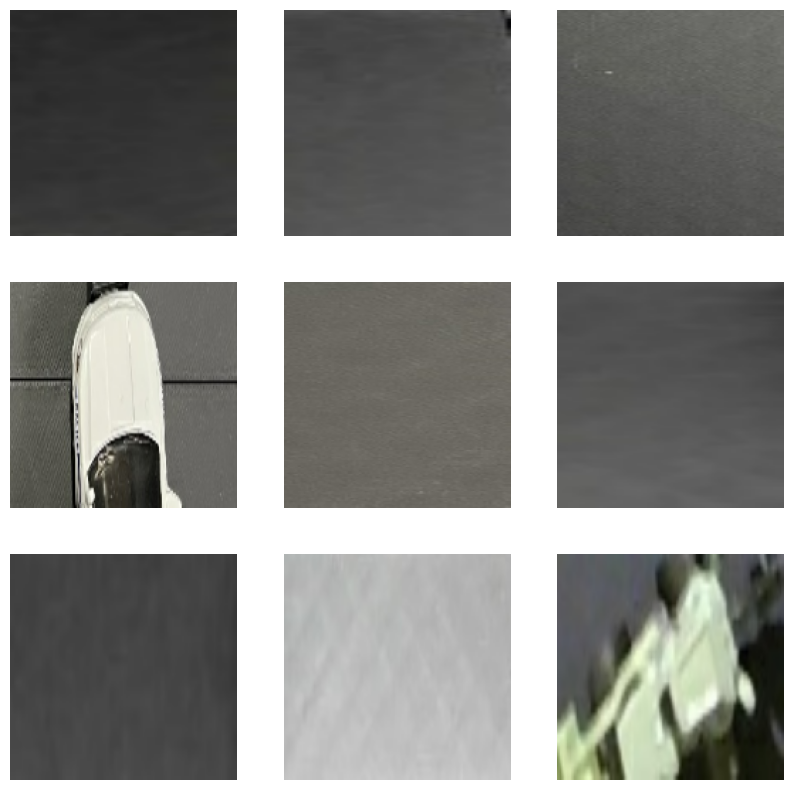

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")
plt.show()


In [13]:
IMG_SIZE = 64

resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  layers.Rescaling(1./255)
])

## Building the CNN Model
In this section, define the architecture of the CNN model. The architecture may consist of:
- Convolutional layers with max-pooling
- Dropout layers
- Flatten layer
- Dense layers
- Output layer

Add and remove any of these as needed!

In [58]:
model = Sequential()
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
model = Sequential()

# Convolutional Layer 1
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(img_size[0], img_size[1], 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutional Layer 3
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))

# Output layer - Since you have 2 classes, use 2 units
model.add(Dense(units=2, activation='softmax'))

## Training the Model
Train the CNN model using the training data and validate it on the validation set.

In [59]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [60]:

history = model.fit(train_data, epochs=20,validation_data=val_data, steps_per_epoch=train_data.samples // batch_size, validation_steps=val_data.samples // batch_size)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 42s 927ms/step - accuracy: 0.7452 - loss: 0.4489 - val_accuracy: 0.9563 - val_loss: 0.1029
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9062 - loss: 0.1872 - val_accuracy: 0.9583 - val_loss: 0.1574
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 79s 885ms/step - accuracy: 0.9469 - loss: 0.1703 - val_accuracy: 0.9625 - val_loss: 0.1004
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 1.0000 - loss: 0.0135 - val_accuracy: 0.9583 - val_loss: 0.0727
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 80s 900ms/step - accuracy: 0.9573 - loss: 0.1378 - val_accuracy: 0.9625 - val_loss: 0.0795
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9688 - loss: 0.0717 - val_accuracy: 0.9583 - val_loss: 0.0859
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 39s 895ms/step - accuracy: 0.9788 - loss: 0.0714 - val_accuracy: 0.9688 - val_loss: 0.0824
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9688 - loss: 0.0628 - val_accuracy: 1.000

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [47]:

val_loss, val_accuracy = model.evaluate(val_data)
print(f"Validation Accuracy: {val_accuracy}")

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 291ms/step - accuracy: 0.9973 - loss: 0.0161
Validation Accuracy: 0.9941860437393188


## Make Predictions
Use the trained model to make predictions on new or unseen traffic sign images.

if you need new, we prepared some data for you [here](www.kaggle.com/datasets/khaledzsa/parkinglot-occupation), or you can simply run the following command to get the data and unzip it.

<small>Note: please note that the file contain MetaData to tell you what each image contains <b>THIS IS JUST FOR YOU TO MAKE SURE</b></smmall>

If you ran the command above, you should have a file called ParkingLot_Occupation in your current directory. which contains the testing dataset.
If you ran the command above <span style='color:red;'>DON'T RUN THIS CELL</span>

In [56]:
!kaggle datasets download -d khaledzsa/parkinglot-occupation
!unzip parkinglot-occupation.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/parkinglot-occupation
License(s): unknown
parkinglot-occupation.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  parkinglot-occupation.zip
replace ParkingLot_Occupation/test/empty/roi_004a880991fb418298519ca2616f3147_empty.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [61]:
y_pred = model.predict(val_data)
y_pred_classes = np.argmax(y_pred, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 296ms/step


## Model Performance Visualization
Visualize performance metrics such as accuracy and loss over the epochs.

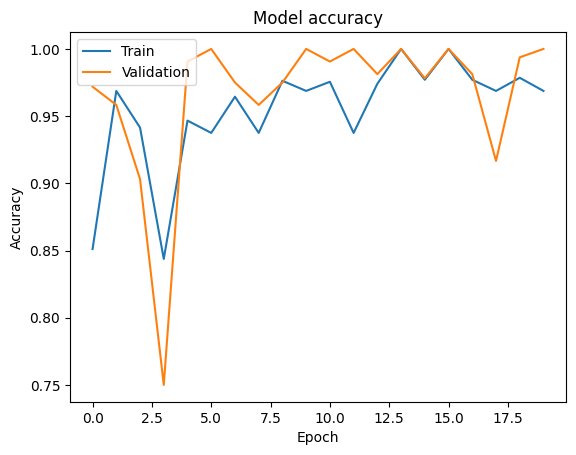

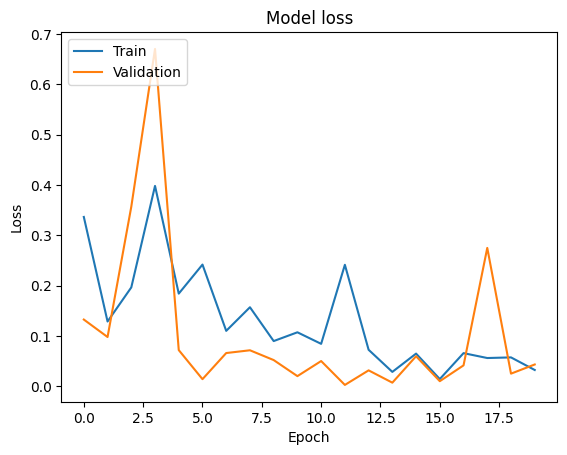

In [54]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Save the Model
Save the trained CNN model for submission.

In [55]:
model.save('dataatask.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., resizing images, normalization, data augmentation). How do these preprocessing steps improve the performance of your CNN model?

ANSWER: i did resizing and other things to make the model train better.

2. **Model Architecture**: Describe the architecture of your CNN model (e.g., number of convolutional layers, kernel sizes, pooling layers). Why did you choose this structure, and how do you expect each layer to contribute to feature extraction?

ANSWER: wallah i dont havetime to write but the layers alredy written!

3. **Activation Functions**: Justify your choice of activation functions. How do they influence the training and output of your CNN?

ANSWER: it is RElu, non linear
4. **Training Process**: Discuss your choice of batch size, number of epochs, and optimizer. How did these decisions impact the training process and the convergence of the model?
ANSWER: to make the model accuracy and performance better

5. **Loss Function and Metrics**: Explain why you chose the specific loss function and evaluation metrics for this classification task. How do they align with the goal of correctly classifying traffic signs?

ANSWER:
6. **Regularization Techniques**: If you used regularization methods like dropout or batch normalization, explain why you implemented them and how they helped prevent overfitting in your model.

ANSWER:
7. **Model Evaluation**: Justify the method you used to evaluate your model's performance on the test set. Why did you select these evaluation techniques, and what insights did they provide about your model's accuracy and generalization ability?

ANSWER:
8. **Model Visualization**: Explain the significance of the performance visualizations (e.g., accuracy and loss curves). What do they tell you about your model's training process and its ability to generalize?

ANSWER:it is work perfectly
9. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
ANSWER:there no underfitting or overfitting

### Answer Here: